In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,KFold,LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [69]:
# Example vehicle data
data = {
"vehicle_serial_no": [5, 3, 8, 2, 4, 7, 6, 10, 1, 9],
" mileage ": [150000, 120000, 250000, 80000, 100000, 220000, 180000, 300000,75000, 280000],
"fuel_efficiency": [15, 18, 10, 22, 20, 12, 16, 8, 24, 9],
"maintenance_cost": [5000, 4000, 7000, 2000, 3000, 6500, 5500, 8000, 1500, 7500],
"vehicle_type": ["SUV", "Sedan", "Truck", "Hatchback", "Sedan&", "Truck&", "SUV", "Truck","Hatchback&", "SUV"]
}
# Create a DataFrame
df = pd.DataFrame(data)
numerical_cols = df.drop(columns=["vehicle_type"]).columns
# df = pd.get_dummies(df,columns=["vehicle_type"],drop_first=True)
df = df[numerical_cols]
display(df)

,vehicle_serial_no,mileage,fuel_efficiency,maintenance_cost
0,5,150000,15,5000
1,3,120000,18,4000
2,8,250000,10,7000
3,2,80000,22,2000
4,4,100000,20,3000
5,7,220000,12,6500
6,6,180000,16,5500
7,10,300000,8,8000
8,1,75000,24,1500
9,9,280000,9,7500


In [70]:
ss = StandardScaler()
df_scaled = ss.fit_transform(df[numerical_cols])
display(df_scaled)

array([[-0.17407766, -0.32223668, -0.07527099,  0.        ],
       [-0.87038828, -0.70133867,  0.48926145, -0.45643546],
       [ 0.87038828,  0.94143659, -1.0161584 ,  0.91287093],
       [-1.21854359, -1.20680797,  1.24197138, -1.36930639],
       [-0.52223297, -0.95407332,  0.86561642, -0.91287093],
       [ 0.52223297,  0.56233461, -0.63980344,  0.6846532 ],
       [ 0.17407766,  0.0568653 ,  0.11290649,  0.22821773],
       [ 1.5666989 ,  1.57327322, -1.39251337,  1.36930639],
       [-1.5666989 , -1.26999164,  1.61832635, -1.59752413],
       [ 1.21854359,  1.32053857, -1.20433589,  1.14108866]])

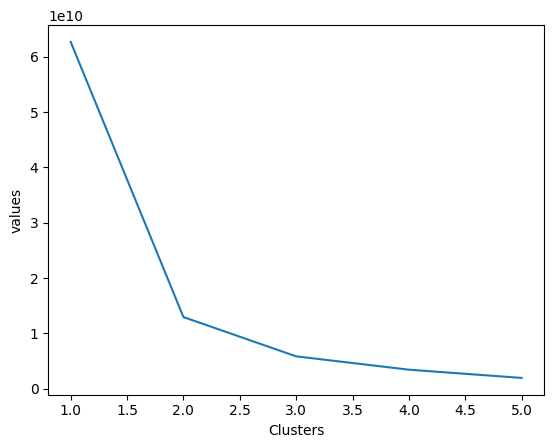

In [71]:
inertias = []
for i in range(1,6):
    km = KMeans(n_clusters=i,init="k-means++",random_state=42)
    km.fit(df)
    inertias.append(km.inertia_)
    
plt.plot(range(1,6),inertias)
plt.xlabel("Clusters")
plt.ylabel("values")
plt.show()

In [72]:
km = KMeans(n_clusters=2,init="k-means++",random_state=42)
km.fit(df)
pred = km.predict(df)
df["Clusters"] = pred

display(df)

,vehicle_serial_no,mileage,fuel_efficiency,maintenance_cost,Clusters
0,5,150000,15,5000,0
1,3,120000,18,4000,0
2,8,250000,10,7000,1
3,2,80000,22,2000,0
4,4,100000,20,3000,0
5,7,220000,12,6500,1
6,6,180000,16,5500,1
7,10,300000,8,8000,1
8,1,75000,24,1500,0
9,9,280000,9,7500,1


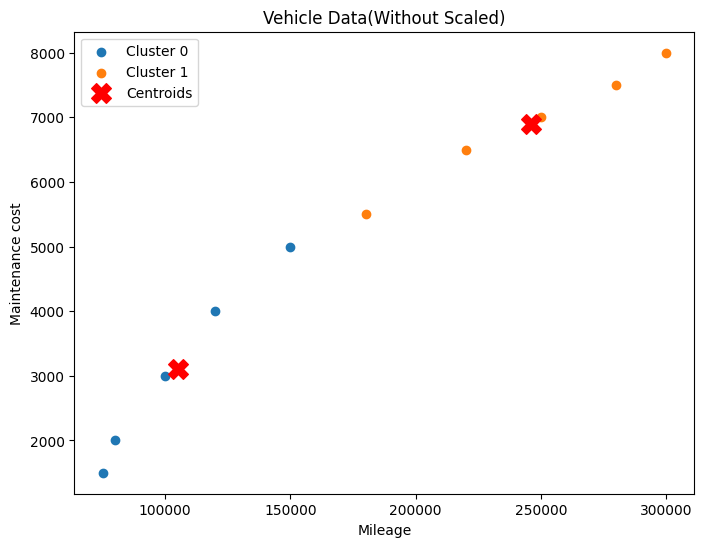

In [73]:
plt.figure(figsize=(8, 6))
for cluster in range(2):  
    cluster_points = df[df["Clusters"] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 1], 
        cluster_points.iloc[:, 3],  
        label=f"Cluster {cluster}"
    )

plt.scatter(
    km.cluster_centers_[:, 1],
    km.cluster_centers_[:, 3],
    s=200,
    c="red",
    marker="X",
    label="Centroids"
)

plt.title("Vehicle Data(Without Scaled)")
plt.xlabel("Mileage")
plt.ylabel("Maintenance cost")
plt.legend()
plt.show()


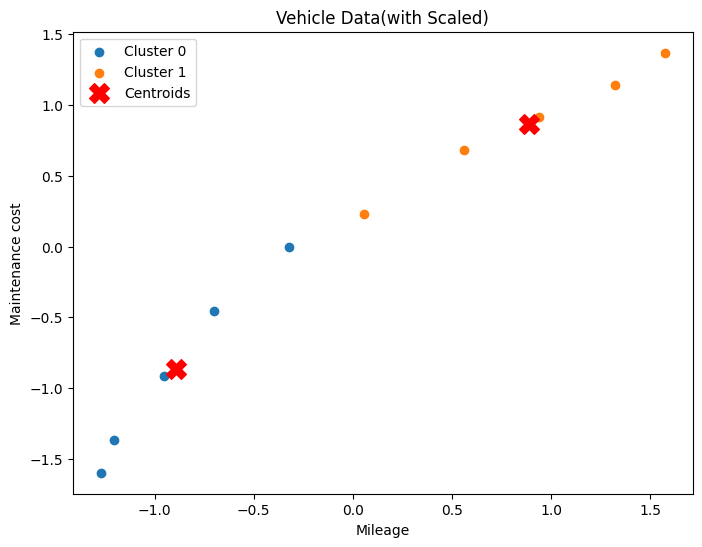

In [74]:
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)
km = KMeans(n_clusters=2,init="k-means++",random_state=42)
km.fit(df_scaled)
pred = km.predict(df_scaled)
df_scaled["Clusters"] = pred
plt.figure(figsize=(8, 6))
for cluster in range(2):  
    cluster_points = df_scaled[df_scaled["Clusters"] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 1], 
        cluster_points.iloc[:, 3],  
        label=f"Cluster {cluster}"
    )

plt.scatter(
    km.cluster_centers_[:, 1],
    km.cluster_centers_[:, 3],
    s=200,
    c="red",
    marker="X",
    label="Centroids"
)

plt.title("Vehicle Data(with Scaled)")
plt.xlabel("Mileage")
plt.ylabel("Maintenance cost")
plt.legend()
plt.show()
